# Practica Guiada 02
Este notebook aborda el preprocesamiento, exploración y análisis de relaciones en el dataset de fraude crediticio, seguido de un escalamiento multidimensional (MDS) para su interpretación visual.


Integrantes:
- Edison Jean Franco Coaguila Fuentes
- Joe Maicol Turpo Queque
- Alfredo Mauricio Aragon Ovalle

# Importación de librerías
Se importan las librerías necesarias para el análisis y visualización de datos.

In [2]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from category_encoders import OneHotEncoder, OrdinalEncoder
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler

In [5]:
path = kagglehub.dataset_download("mishra5001/credit-card")

In [6]:
print(path)

C:\Users\Ryzen\.cache\kagglehub\datasets\mishra5001\credit-card\versions\1


# Preprocesamiento de variables y relaciones entre los datos
<span style='font-size:16px'><b>Descarga y carga del dataset</b></span>
Se descarga el dataset desde Kaggle y se carga en un DataFrame de pandas.

In [4]:
data = pd.read_csv("C:\\Users\\Ryzen\\.cache\\kagglehub\\datasets\\mishra5001\\credit-card\\versions\\1\\application_data.csv")

In [7]:
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.duplicated().sum()

0

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [10]:
data.describe(include='object').T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [11]:
for column in data.select_dtypes(include=["object"]):
  print(column, "->", data[column].unique())
  print()

NAME_CONTRACT_TYPE -> ['Cash loans' 'Revolving loans']

CODE_GENDER -> ['M' 'F' 'XNA']

FLAG_OWN_CAR -> ['N' 'Y']

FLAG_OWN_REALTY -> ['Y' 'N']

NAME_TYPE_SUITE -> ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE -> ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE -> ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS -> ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE -> ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

OCCUPATION_TYPE -> ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Wa

<span style='font-size:16px'><b>Exploración inicial de los datos</b></span>
Se realiza una inspección básica del dataset para entender su estructura y contenido.

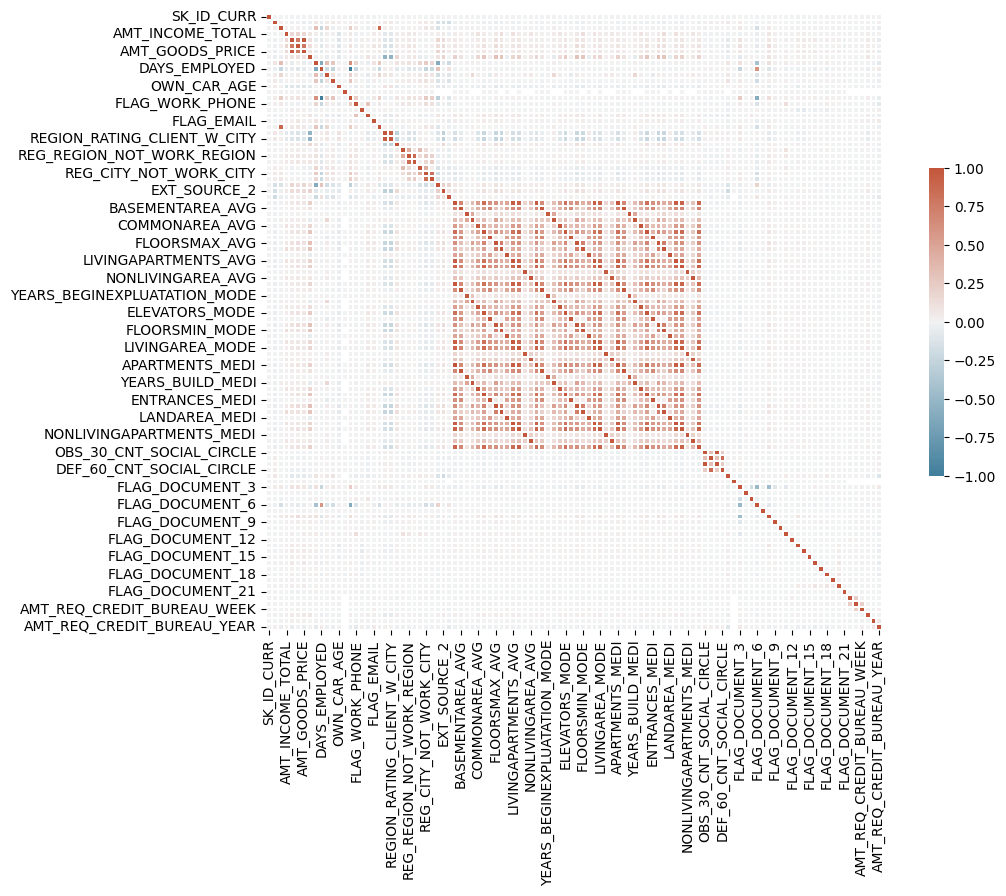

In [12]:
numericos = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
nominales = data.select_dtypes(include=['object']).columns.tolist()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = data[numericos].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.10, cbar_kws={"shrink": .5})
plt.show()

<span style='font-size:16px'><b>Análisis de correlación entre variables numéricas</b></span>
Se examinan las relaciones entre variables numéricas mediante un mapa de calor de correlaciones.

In [13]:
nominales = [
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_FAMILY_STATUS", 
    "NAME_HOUSING_TYPE",
    "OCCUPATION_TYPE",
    "ORGANIZATION_TYPE",
    "FONDKAPREMONT_MODE",
    "HOUSETYPE_MODE",
    "WALLSMATERIAL_MODE",
    "EMERGENCYSTATE_MODE"
]

ordinales = [
    "NAME_EDUCATION_TYPE",
    "WEEKDAY_APPR_PROCESS_START"
]

<span style='font-size:16px'><b>Identificación de variables nominales y ordinales</b></span>
Se definen las variables categóricas nominales y ordinales para su posterior codificación.

In [14]:
mappings = [
    {'col' : 'NAME_EDUCATION_TYPE',
     'mapping' : {
        'No education' : 0,
        'Incomplete higher' : 1,
        'Secondary / secondary special' : 2,
        'Higher education' : 3,
        'Academic degree' : 4
     }
    },
    {'col' : 'WEEKDAY_APPR_PROCESS_START',
     'mapping' : {
        'MONDAY' : 0,
        'TUESDAY' : 1,
        'WEDNESDAY' : 2,
        'THURSDAY' : 3,
        'FRIDAY' : 4,
        'SATURDAY' : 5,
        'SUNDAY' : 6
     }
    }
]

<span style='font-size:16px'><b>Mapeo y codificación de variables</b></span>
Se crean los mapeos para variables ordinales y se aplican codificadores para transformar las variables categóricas.

In [15]:
onehotenc = OneHotEncoder(cols = nominales)
ordinalenc = OrdinalEncoder(cols = ordinales, mapping = mappings)


In [16]:
data_nominal_encoded = onehotenc.fit_transform(data[nominales])
data_nominal_encoded.head(10)


,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,FLAG_OWN_REALTY_2,NAME_TYPE_SUITE_1,...,WALLSMATERIAL_MODE_2,WALLSMATERIAL_MODE_3,WALLSMATERIAL_MODE_4,WALLSMATERIAL_MODE_5,WALLSMATERIAL_MODE_6,WALLSMATERIAL_MODE_7,WALLSMATERIAL_MODE_8,EMERGENCYSTATE_MODE_1,EMERGENCYSTATE_MODE_2,EMERGENCYSTATE_MODE_3
0,1,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
4,1,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
5,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
6,1,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1
7,1,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1
8,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
9,0,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [17]:
data_ordinal_encoded = ordinalenc.fit_transform(data[ordinales])
data_ordinal_encoded.head(10)

,NAME_EDUCATION_TYPE,WEEKDAY_APPR_PROCESS_START
0,2.0,2
1,3.0,0
2,2.0,0
3,2.0,2
4,2.0,3
5,2.0,2
6,3.0,6
7,3.0,0
8,2.0,2
9,2.0,3


In [18]:
data2 = data_nominal_encoded.join(data_ordinal_encoded)
sample = data2.sample(1000, random_state=42)

scaler = MinMaxScaler()

sample[sample.columns] = scaler.fit_transform(sample[sample.columns])

<span style='font-size:16px'><b>Escalamiento de variables</b></span>
Se combinan las variables codificadas y se aplica un escalamiento MinMax para normalizar los datos.

In [19]:
sample.head(10)

,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,FLAG_OWN_REALTY_2,NAME_TYPE_SUITE_1,...,WALLSMATERIAL_MODE_4,WALLSMATERIAL_MODE_5,WALLSMATERIAL_MODE_6,WALLSMATERIAL_MODE_7,WALLSMATERIAL_MODE_8,EMERGENCYSTATE_MODE_1,EMERGENCYSTATE_MODE_2,EMERGENCYSTATE_MODE_3,NAME_EDUCATION_TYPE,WEEKDAY_APPR_PROCESS_START
245895,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.75,0.500000
98194,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.00,0.500000
36463,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.75,0.166667
249923,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.666667
158389,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.333333
226343,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.75,0.500000
69571,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.75,0.333333
181469,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.666667
114736,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.75,0.833333
114007,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.333333


In [20]:
dist = squareform(pdist(sample,'euclidean'))
dist

array([[0.        , 4.00780489, 2.47206616, ..., 4.47524053, 2.46784882,
        4.47524053],
       [4.00780489, 0.        , 4.26305185, ..., 2.84434136, 4.00347072,
        4.25326672],
       [2.47206616, 4.26305185, 0.        , ..., 4.47524053, 2.88314065,
        4.27200187],
       ...,
       [4.47524053, 2.84434136, 4.47524053, ..., 0.        , 4.26305185,
        4.01386486],
       [2.46784882, 4.00347072, 2.88314065, ..., 4.26305185, 0.        ,
        4.69707356],
       [4.47524053, 4.25326672, 4.27200187, ..., 4.01386486, 4.69707356,
        0.        ]])

# Escalamiento multidimensional de los datos e interpretación correspondiente
<span style='font-size:16px'><b>Cálculo de distancias y aplicación de MDS</b></span>
Se calcula la matriz de distancias euclidianas y se aplica el escalamiento multidimensional (MDS) para reducir la dimensionalidad.

In [21]:
mds = MDS(dissimilarity='precomputed',verbose=2)

In [22]:
transformed = mds.fit_transform(dist)

c:\Users\Ryzen\UPC\UPC-2025-02\Data Mining Tools\Repositorio\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Iteration 0, stress 1386749.6301
Iteration 1, stress 1351005.4907
Iteration 2, stress 1323946.2325
Iteration 3, stress 1302180.9224
Iteration 4, stress 1283985.7198
Iteration 5, stress 1268239.4193
Iteration 6, stress 1254752.8337
Iteration 7, stress 1243435.1381
Iteration 8, stress 1233840.5658
Iteration 9, stress 1225533.1888
Iteration 10, stress 1218288.6634
Iteration 11, stress 1211931.2271
Iteration 6, stress 1254752.8337
Iteration 7, stress 1243435.1381
Iteration 8, stress 1233840.5658
Iteration 9, stress 1225533.1888
Iteration 10, stress 1218288.6634
Iteration 11, stress 1211931.2271
Iteration 12, stress 1206276.0387
Iteration 13, stress 1201210.7703
Iteration 14, stress 1196609.2785
Iteration 15, stress 1192365.0096
Iteration 16, stress 1188423.9401
Iteration 17, stress 1184697.1584
Iteration 12, stress 1206276.0387
Iteration 13, stress 1201210.7703
Iteration 14, stress 1196609.2785
Iteration 15, stress 1192365.0096
Iteration 16, stress 1188423.9401
Iteration 17, stress 1184697

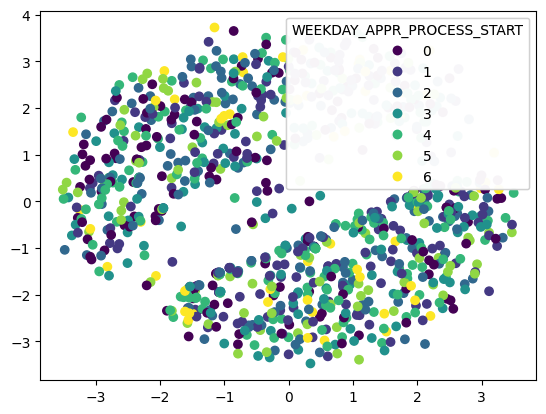

In [23]:
fig, ax = plt.subplots()

scatter = ax.scatter(transformed[:,0],transformed[:,1], c=sample.WEEKDAY_APPR_PROCESS_START*6)

legend = ax.legend(*scatter.legend_elements(), title="WEEKDAY_APPR_PROCESS_START")
ax.add_artist(legend)

<span style='font-size:16px'><b>Visualización de resultados</b></span>
Se visualizan los datos transformados por MDS, coloreando por el día de la semana en que se inició el proceso de solicitud.

<span style='font-size:16px'><b>Interpretación</b></span>
No se observa una agrupación clara de los puntos por día de la semana, lo que sugiere que esta variable no tiene una influencia fuerte en la estructura global de los datos codificados y escalados

In [ ]:
#agregar mas imagenes


# Clase para el procesamiento de las variables
